In [38]:
from numpy import float32
from os import chdir, listdir
from warnings import simplefilter
from xarray import DataArray, open_dataset
simplefilter("ignore")

In [82]:
chdir('/home/zhangc/WPS/output_metgrid/cmip6/')

In [96]:
chdir('/home/zhangc/repositories/nc2im_cesm2/')

In [97]:
nc = 'map_gx1v7_TO_fv0.9x1.25_aave.151008.nc'

In [74]:
from matplotlib import pyplot as plt

In [83]:
nc = 'met_em.d01.2001-01-01_00:00:00.nc'

In [98]:
ds = open_dataset(nc)

In [99]:
ds

<xarray.Dataset>
Dimensions:        (dst_grid_rank: 2, n_a: 122880, n_b: 55296, n_s: 253332, nv_a: 4, nv_b: 4, src_grid_rank: 2)
Dimensions without coordinates: dst_grid_rank, n_a, n_b, n_s, nv_a, nv_b, src_grid_rank
Data variables:
    src_grid_dims  (src_grid_rank) int32 ...
    dst_grid_dims  (dst_grid_rank) int32 ...
    yc_a           (n_a) float64 ...
    yc_b           (n_b) float64 ...
    xc_a           (n_a) float64 ...
    xc_b           (n_b) float64 ...
    yv_a           (n_a, nv_a) float64 ...
    xv_a           (n_a, nv_a) float64 ...
    yv_b           (n_b, nv_b) float64 ...
    xv_b           (n_b, nv_b) float64 ...
    mask_a         (n_a) int32 ...
    mask_b         (n_b) int32 ...
    area_a         (n_a) float64 ...
    area_b         (n_b) float64 ...
    frac_a         (n_a) float64 ...
    frac_b         (n_b) float64 ...
    col            (n_s) int32 ...
    row            (n_s) int32 ...
    S              (n_s) float64 ...
Attributes:
    title:               ESMF Offline Regridding Weight Generator
    normalization:       destarea
    map_method:          Conservative remapping
    ESMF_regrid_method:  First-order Conservative
    conventions:         NCAR-CSM
    domain_a:            /glade/p/cesmdata/cseg/mapping/grids/gx1v7_151008.nc
    domain_b:            /glade/p/cesmdata/cseg/mapping/grids/fv0.9x1.25_1410...
    grid_file_src:       /glade/p/cesmdata/cseg/mapping/grids/gx1v7_151008.nc
    grid_file_dst:       /glade/p/cesmdata/cseg/mapping/grids/fv0.9x1.25_1410...
    CVS_revision:        6.3.0rp1
    creation_date:       Thu Oct  8 15:18:10 MDT 2015
    created_by:          mlevy
    run_command:         mpirun.lsf ESMF_RegridWeightGen --ignore_unmapped -m...
    ESMF_ver:            ESMF_VERSION_STRING: 6.3.0rp1
    hostname:            caldera15

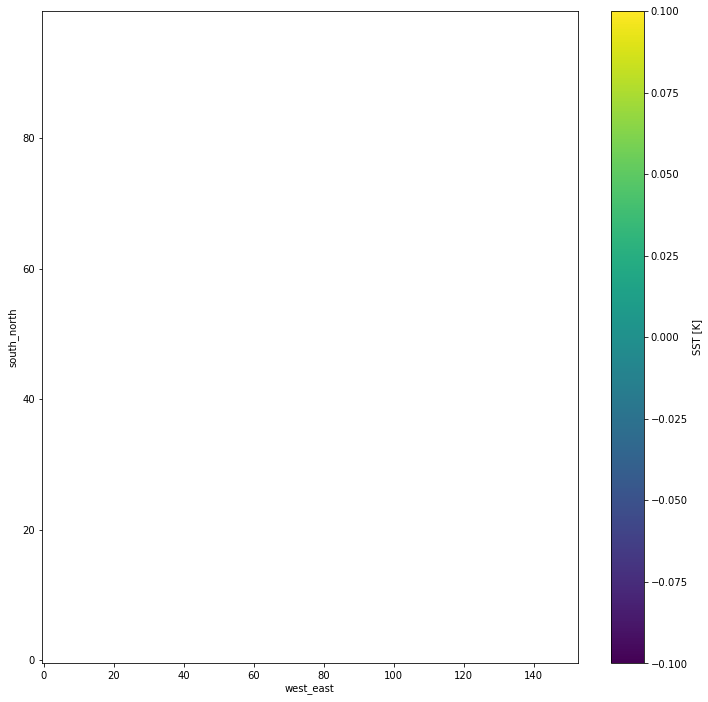

In [94]:
ds.SST.plot()

In [ ]:
ds.ST[0][0].plot(vmin=236,vmax=285)

In [ ]:
chdir('/home/zhangc/WRF/run_cordex/')

In [ ]:
nc = 'auxhist3_d01_2001-01-02_00:00:00'

In [ ]:
ds = open_dataset(nc)

In [ ]:
ds.T2MEAN.plot()